In [1]:
!pip install opencv-python numpy matplotlib
import cv2
import numpy as np
import matplotlib.pyplot as plt

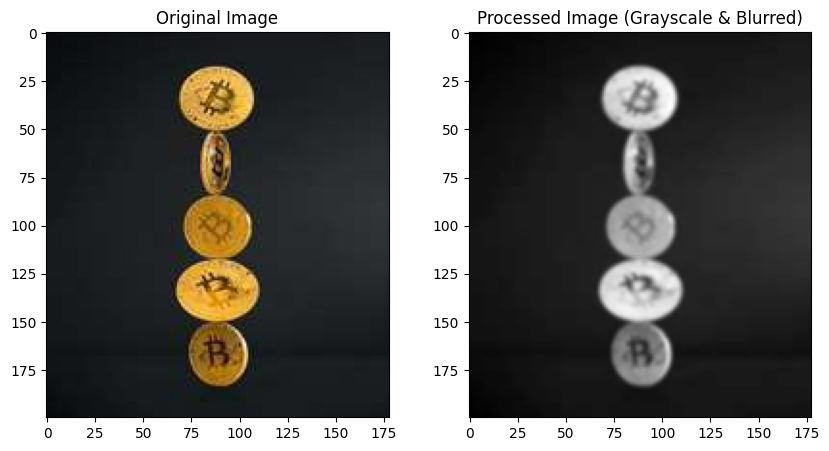

In [20]:

# Load Image
image_path = "/content/bitss.jpg"
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Image not found! Make sure the image path is correct.")

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
blurred_image = cv2.GaussianBlur(gray, (5, 5), 0)
# Display the original and processed images (optional)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Processed Image (Grayscale & Blurred)')

plt.show()

Unable to accurately count the number of objects even with curves filter

Number of objects detected: 5


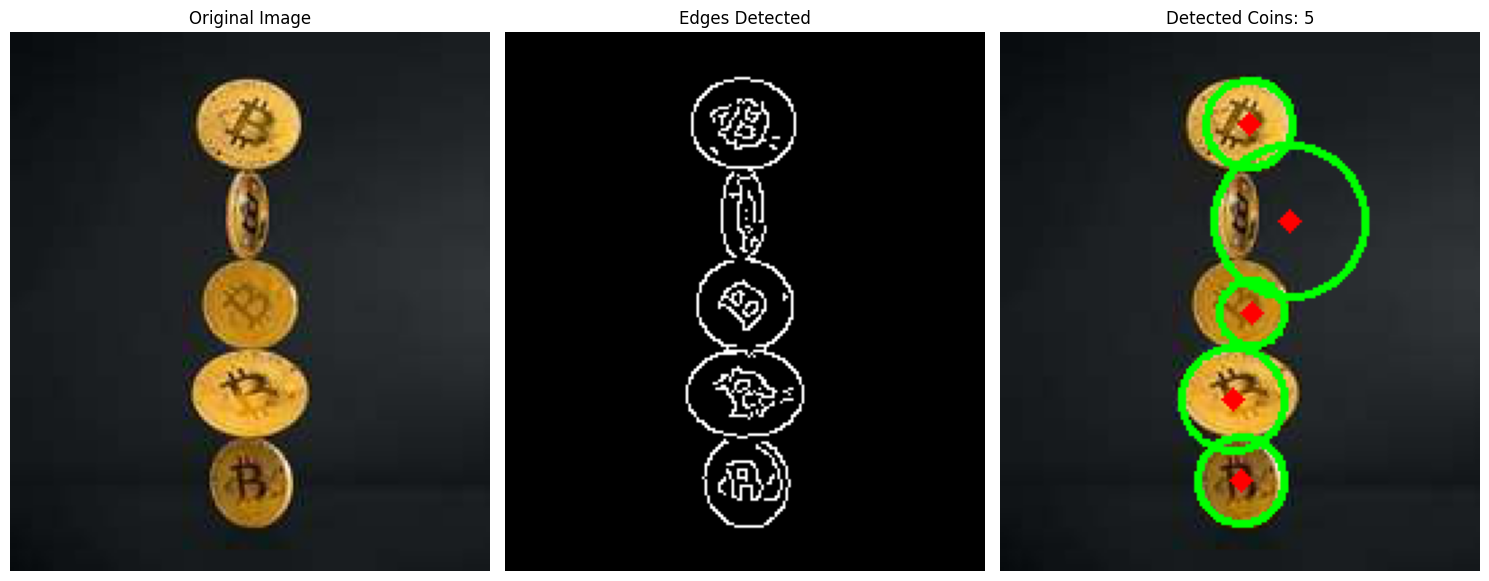

In [19]:
# Detect Edges using Canny Edge Detector
edges = cv2.Canny(blurred, 50, 100)

# Detect Circles using Hough Circle Transform
circles = cv2.HoughCircles(
    gray,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=30,
    param1=20,
    param2=28,
    minRadius=8,
    maxRadius=30
)

# Copy image for visualization
output_image = image.copy()

# If circles are detected
object_count = 0
if circles is not None:
    circles = np.uint16(np.around(circles))  # Round to integers
    object_count = len(circles[0])  # Number of circles detected

    for circle in circles[0, :]:
        x, y, radius = circle
        # Draw the circle
        cv2.circle(output_image, (x, y), radius, (0, 255, 0), 2)
        # Draw the center of the circle
        cv2.circle(output_image, (x, y), 2, (0, 0, 255), 3)

print(f"Number of objects detected: {object_count}")

# Visualization
plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")

# Edges Detected
plt.subplot(1, 3, 2)
plt.title("Edges Detected")
plt.imshow(edges, cmap="gray")
plt.axis("off")

# Final Detected Coins
plt.subplot(1, 3, 3)
plt.title(f"Detected Coins: {object_count}")
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.tight_layout()
plt.show()


 Due to the tilt of the circle coins they oriented as ellipses. It is not an easy object detection task.